In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [9]:
file_path = 'train.csv'
df = pd.read_csv(file_path, header=0)
print(df.tail(10))

     PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
881    male  33.0      0      0            

**Handling missing values**

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

** Data type conversion**

In [11]:
df['Survived'] = df['Survived'].astype('int')
df['Pclass'] = df['Pclass'].astype('int')
df['SibSp'] = df['SibSp'].astype('int')
df['Parch'] = df['Parch'].astype('int')
df['Fare'] = df['Fare'].astype('float')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

**Feature engineering**

In [12]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Misc')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype('int')

In [13]:
df['Title'] = df['Title'].astype('category').cat.codes
df['Embarked'] = df['Embarked'].astype('category').cat.codes

In [14]:
print(df.tail(10))

     PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare    Cabin  Embarked  \
881    male  33.0      0      0       

**Descriptive statistics**

In [15]:
print("\nDescriptive Statistics:")
print(df.describe())
print("\nDescriptive Statistics for Categorical Variables:")
print(df.describe(include=['category']))


Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare    Embarked       Title  FamilySize     IsAlone  
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.536476    4.204265    1.904602    0.602694  
std      0.806057   49.693429    0.791503    1.700239    1.613459    0.489615  
min      0.000000    0.0

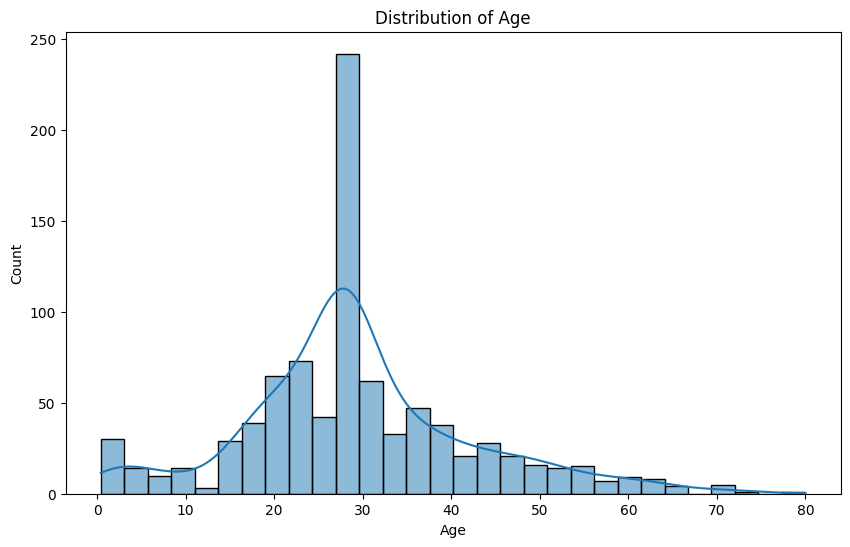

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

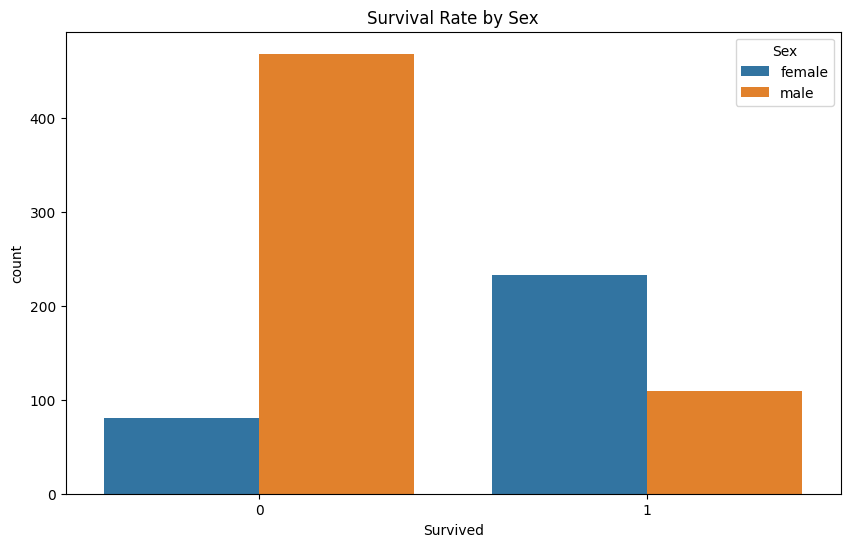

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Sex')
plt.show()

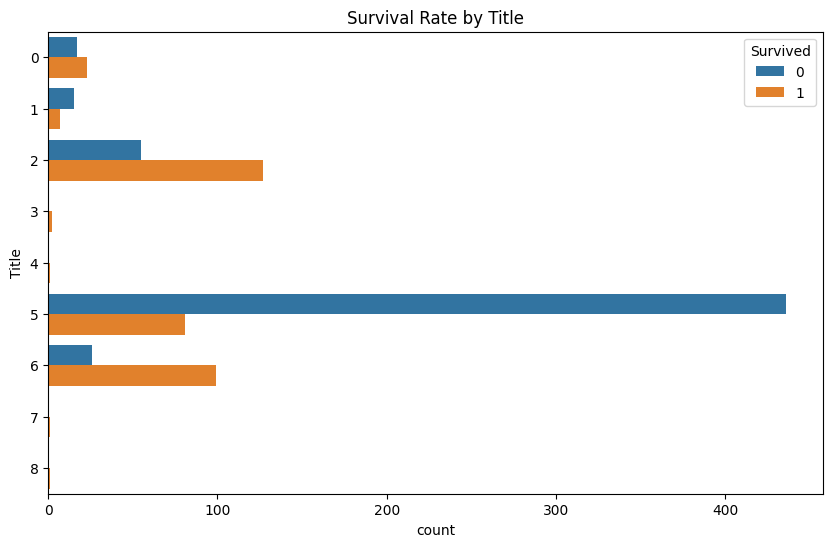

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Title', hue='Survived', data=df)
plt.title('Survival Rate by Title')
plt.show()

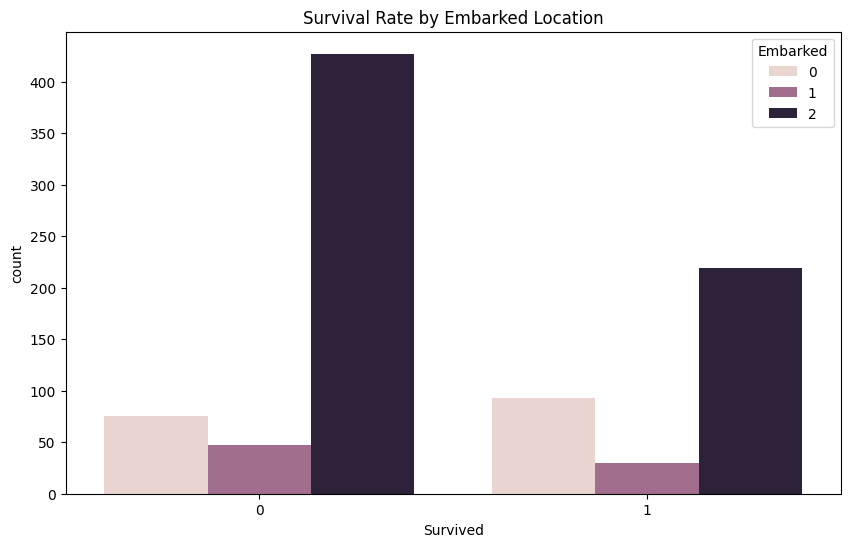

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Rate by Embarked Location')
plt.show()

**Correlation heatmap**

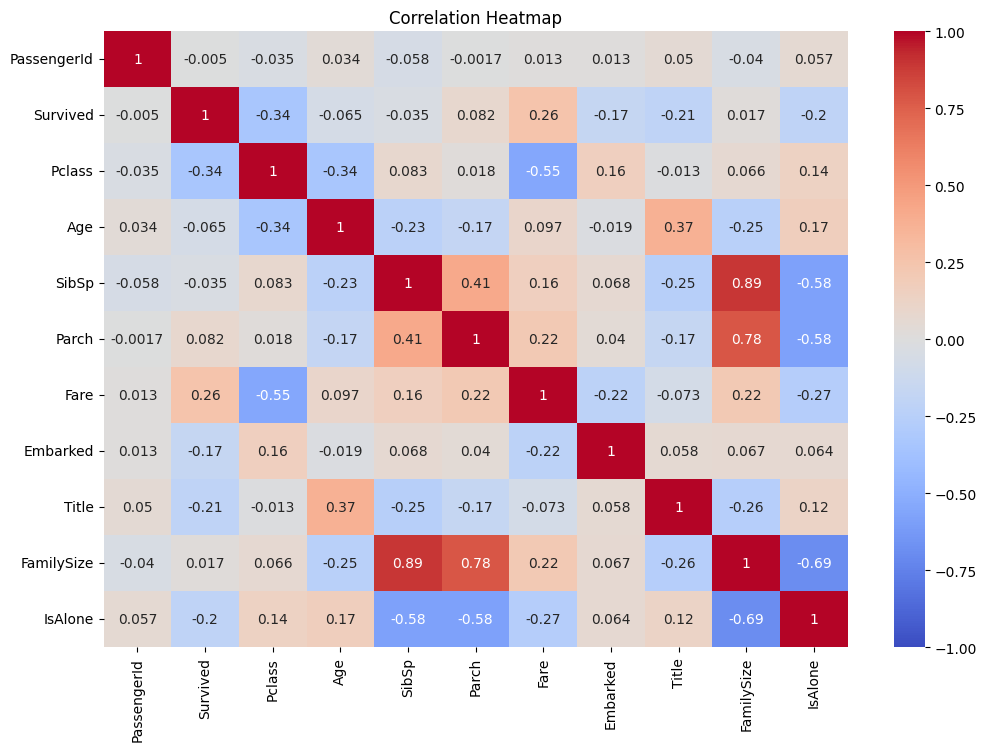

In [23]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()